### 🔍 What is **Feature Importance** in Machine Learning?

**Feature Importance** tells you **which input features (columns/variables)** in your dataset have the most influence on your model's predictions.

---
### ✅ Why is Feature Importance Important?

* 🎯 Helps in **feature selection**: You can remove less important features.
* 🚀 Improves **model performance** and **training time**.
* 🧠 Improves **interpretability**: You understand **what the model has learned**.

---
### 🧪 How to Get Feature Importance (By Model Type)
#### 🔹 1. **Tree-Based Models** (Random Forest, XGBoost, LightGBM)

These models have `.feature_importances_` built-in.

```python
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = X_train.columns

# Plot
pd.Series(importances, index=features).sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()
```
---
#### 🔹 2. **Logistic Regression / Linear Models**

Use the absolute value of model coefficients.
```python
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get feature importance
importance = np.abs(model.coef_[0])
features = X_train.columns

# Create DataFrame correctly
feature_importance = pd.DataFrame({
    "Features": features,
    "Importance": importance
}).sort_values(by='Importance', ascending=False)

# Print table
feature_importance
```
#### Plot
```python
plt.figure(figsize=(6, 4))
plt.bar(feature_importance["Features"], feature_importance["Importance"])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance (Logistic Regression)')
plt.ylabel('Absolute Coefficient Value')
plt.grid(True)
plt.tight_layout()
plt.show()
```
---
#### 🔹 3. **Permutation Importance** (Model-agnostic)

Works with **any model** by measuring drop in performance when a feature is shuffled.

```python
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

pd.Series(importance, index=X_test.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Permutation Feature Importance')
plt.show()
```

---
#### 🔹 4. **SHAP (SHapley Additive exPlanations)** – Advanced & Accurate

Works for tree models, linear models, and even deep learning.

```python
import shap

explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)
```
---
### 📌 Best Practice Tips

| Model Type      | Best Method                   |
| --------------- | ----------------------------- |
| Tree-based      | `.feature_importances_`, SHAP |
| Linear          | Coefficients, SHAP            |
| Any model       | Permutation, SHAP             |
| Neural Networks | SHAP or Integrated Gradients  |

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.duplicated().sum()

1

In [4]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [5]:
df.drop_duplicates(inplace = True)

In [6]:
#split the data
X = df.drop("target", axis =1)
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get feature importance
importance = np.abs(model.coef_[0])
features = X_train.columns

# Create DataFrame correctly
feature_importance = pd.DataFrame({
    "Features": features,
    "Importance": importance
}).sort_values(by='Importance', ascending=False)

# Print table
feature_importance

,Features,Importance
1,sex,1.248740
12,thal,0.980001
11,ca,0.812147
8,exang,0.806703
2,cp,0.724614
10,slope,0.720235
6,restecg,0.616329
9,oldpeak,0.467020
5,fbs,0.292611
3,trestbps,0.025562


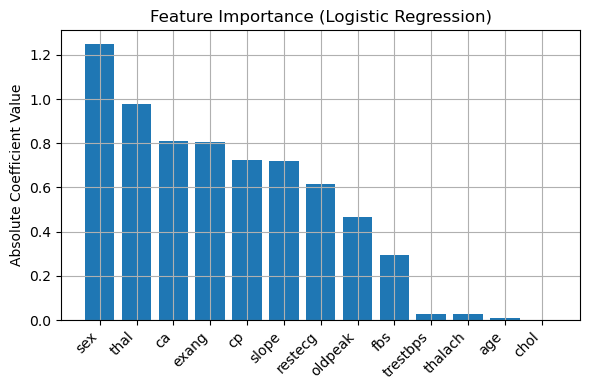

In [8]:
# Plot
plt.figure(figsize=(6, 4))
plt.bar(feature_importance["Features"], feature_importance["Importance"])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance (Logistic Regression)')
plt.ylabel('Absolute Coefficient Value')
plt.grid(True)
plt.tight_layout()
plt.show()

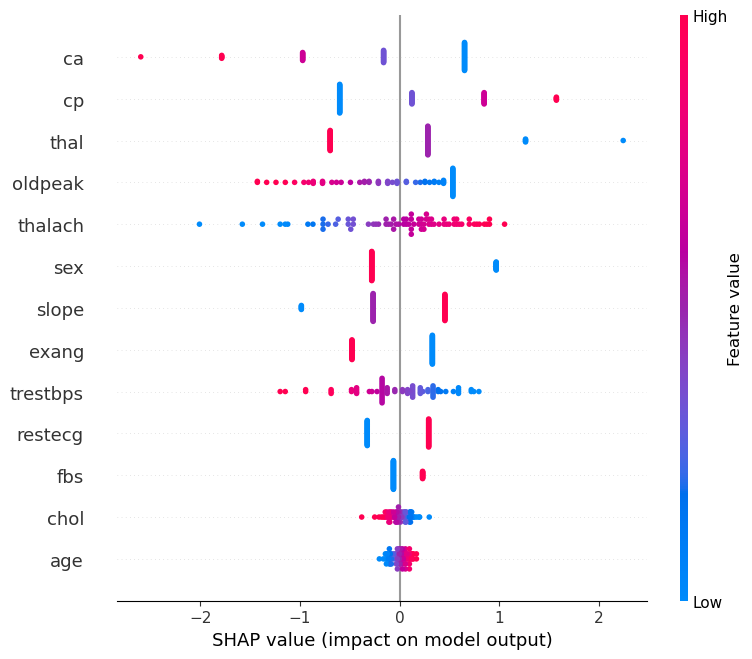

In [9]:
import shap

explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

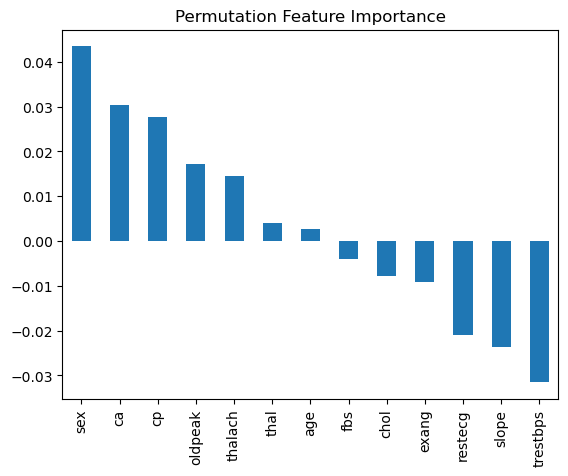

In [10]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

pd.Series(importance, index=X_test.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Permutation Feature Importance')
plt.show()

ROC AUC Score: 0.9198606271777003


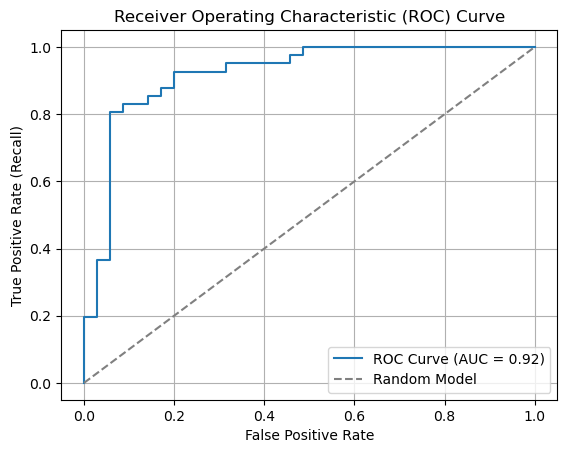

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %.2f)' % roc_auc_score(y_test, y_probs))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
from sklearn.metrics import *
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8421052631578947

In [18]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Use DataFrame again
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9198606271777003
